In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)
x.shape, y.shape

((150, 4), (150,))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((96, 4), (24, 4), (30, 4), (96,), (24,), (30,))

In [6]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true_one_hot, y_pred):
    # y_true_one_hot: dạng one-hot vector (N, num_classes)
    # y_pred: xác suất từ hàm softmax (N, num_classes)
    return -np.mean(np.sum(y_true_one_hot * np.log(y_pred + 1e-10), axis=1))

def to_one_hot(y, num_classes):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

class SoftmaxRegression:
    def __init__(self, num_feature, num_classes):
        self.num_feature = num_feature
        self.num_classes = num_classes
        # Khởi tạo weights: (số đặc trưng x số lớp)
        self.weights = np.random.randn(num_feature, num_classes) * 0.01
        self.bias = np.zeros((1, num_classes))

    def fit(self, epochs: int, learning_rate: float, x_train, y_train, x_val, y_val):
        N = len(y_train)
        # Chuyển nhãn y (0, 1, 2...) sang dạng one-hot để tính loss và gradient
        y_train_one_hot = to_one_hot(y_train, self.num_classes)
        y_val_one_hot = to_one_hot(y_val, self.num_classes)
        
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            z_train = x_train @ self.weights + self.bias
            y_pred = softmax(z_train)
            
            train_cost = cross_entropy(y_train_one_hot, y_pred)
            train_losses.append(train_cost)

            error = y_pred - y_train_one_hot 
            dw = (1 / N) * x_train.T @ error
            db = (1 / N) * np.sum(error, axis=0, keepdims=True)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            z_val = x_val @ self.weights + self.bias
            val_pred = softmax(z_val)
            val_cost = cross_entropy(y_val_one_hot, val_pred)
            val_losses.append(val_cost)

            y_pred_labels = np.argmax(val_pred, axis=1)
            accuracy = np.mean(y_pred_labels == y_val)

            if (epoch + 1) % 10 == 0 or epoch == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_cost:.4f}, Val Acc: {accuracy:.4f}")

        return train_losses, val_losses
    
    def predict(self, x_test):
        z = x_test @ self.weights + self.bias
        y_pred = softmax(z)
        return np.argmax(y_pred, axis=1)

In [9]:
model = SoftmaxRegression(x_train.shape[1], 3)
train_losses, val_losses = model.fit(50000, 0.01, x_train, y_train, x_val, y_val)

Epoch 1/50000, Train Loss: 1.1040, Val Acc: 0.3333
Epoch 10/50000, Train Loss: 1.0275, Val Acc: 0.3333
Epoch 20/50000, Train Loss: 0.9729, Val Acc: 0.6667
Epoch 30/50000, Train Loss: 0.9252, Val Acc: 0.6667
Epoch 40/50000, Train Loss: 0.8833, Val Acc: 0.6667
Epoch 50/50000, Train Loss: 0.8465, Val Acc: 0.6667
Epoch 60/50000, Train Loss: 0.8139, Val Acc: 0.6667
Epoch 70/50000, Train Loss: 0.7851, Val Acc: 0.6667
Epoch 80/50000, Train Loss: 0.7594, Val Acc: 0.6667
Epoch 90/50000, Train Loss: 0.7365, Val Acc: 0.6667
Epoch 100/50000, Train Loss: 0.7159, Val Acc: 0.6667
Epoch 110/50000, Train Loss: 0.6973, Val Acc: 0.6667
Epoch 120/50000, Train Loss: 0.6805, Val Acc: 0.6667
Epoch 130/50000, Train Loss: 0.6652, Val Acc: 0.6667
Epoch 140/50000, Train Loss: 0.6512, Val Acc: 0.6667
Epoch 150/50000, Train Loss: 0.6383, Val Acc: 0.7083
Epoch 160/50000, Train Loss: 0.6265, Val Acc: 0.7083
Epoch 170/50000, Train Loss: 0.6155, Val Acc: 0.7083
Epoch 180/50000, Train Loss: 0.6054, Val Acc: 0.7083
Epoc

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


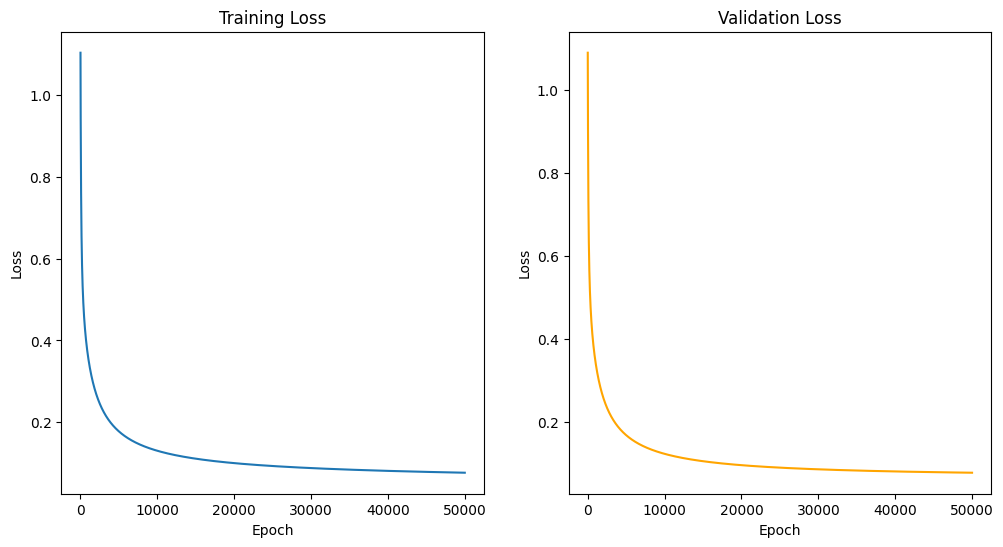

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(train_losses)
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(val_losses, 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()